# CONSTRAINT ANALYSIS

## About this document

This document captures the design algorithm used to place the first set of boundaries around the design domain of the aircraft. The algorithm is implemented in Python, embedded in a Jupyter notebook. You can open this notebook (\tt constraint_analysis.ipynb\rm) by starting the Jupyter server (type \tt jupyter notebook\rm into a terminal window) -- this should open Jupyter in the default browser, pointing at http://localhost:8888.

The variable names were chosen to be as intuitive as possible and additional explanations are provided in places to enhance clarity. The naming convention for all variables is to encapsulate the unit too, separated from the variable name by an underscore:

In [581]:
VariableName_unit = 0

Variable names ending in an underscore are non-dimensional:

In [582]:
VariableName_ = 0

This document captures one instance of a Jupyter notebook document. In other words, it is a parametric, self-building document, compiled from the output of an ipynb file. A similar document can be generated for a different design brief by editing and re-running the ipynb and compiling it with a tool called  \emph{nbconvert} by typing: \tt jupyter nbconvert - - to PDF constraint_analysis.ipynb\rm


This document can now be included in the design audit trail of your aircraft and it can be re-instantiated later for a new design. It is a parametric, living, document.

We have annotated the document with explanatory notes like this one for convenience -- of course, once the conceptual design process is complete, the reader may wish to delete these paragraphs to obtain a more concise document.

## Design brief

The conceptual design process described here starts from the design brief -- essentially a broad brush mission profile -- encapsulated in the following set of numbers.

### Weight

At this stage in the design process it is not uncommon to only be able to provide an initial guess at the design gross weight. This may come from simply multiplying the desired payload weight with the payload fraction (payload weight divided by design gross weight) derived from looking at other aircraft designed for similar missions. In this case this 'zeroth order' guess is:  

In [583]:
DesignGrossWeight_kg = 2.5

### Take-off performance

In [584]:
GroundRun_feet = 290

In [585]:
TakeOffSpeed_KCAS = 23

In [586]:
TakeOffElevation_feet = 0

### Climb performance

The climb performance of an aircraft and its variation with altitude is the result of a complex web of interactions between the aerodynamics of lift generation and the response of its powerplant to varying atmospheric conditions and airspeed. Typically a range of design points have to be considered, representing a variety of conditions, but at this early stage in the design process it is best to keep the number of these design points at a more manageable level.

In [587]:
RateOfClimb_fpm = 984

In [588]:
ClimbSpeed_KCAS = 35

The rate of climb constraint will be evaluated at this altitude:

In [589]:
ROCAlt_feet = 8000

### Turn performance

We define steady, level turn performance in terms of the load factor $n$ (which represents the ratio of lift and weight).

$n=1/\cos{\theta}$, where $\theta$ is the bank angle (so $n=1.2$ corresponds to $30^\circ$, $n=2$ corresponds to $60^\circ$, etc.). 

In [590]:
n_cvt_ = 1.41

### Cruise

The cruising altitude may be viewed in two fundamental ways. First, it may be a constraint -- for example, due to regulatory requirements the aircraft may have to cruise at, say, 350 feet. It can also be viewed as a design variable, in which case you may wish to return to this point in the document and revise it as part of an iterative process of optimization/refinement. 

In [591]:
CruisingAlt_feet = 8000

In [592]:
CruisingSpeed_KTAS = 35

### Service ceiling

In [593]:
ServiceCeiling_feet = 15000

### Approach and Landing

In [594]:
ApproachSpeed_KTAS = 29

We define the margin by which the aircraft operates above its stall speed on final approach (e.g., a reserve factor of 1.2 - typical of manned military aircraft - means flying 20$\%$ above stall, a reserve factor of 1.3 - typical of civil aircraft, means 30$\%$ above stall; for small UAVs, lower values may be considered).  

In [595]:
StallReserveFactor = 1.3

In [596]:
StallSpeedinApproachConf_KTAS = ApproachSpeed_KTAS/StallReserveFactor
print("Stall speed in approach configuration: {:0.1f} KTAS".format(StallSpeedinApproachConf_KTAS))

Stall speed in approach configuration: 22.3 KTAS


Maximum lift coefficient in landing configuration:

In [597]:
CLmax_approach = 1.8

We also define the highest altitude AMSL where we would expect the aircraft to be established on a stable final approach in landing configuration:

In [598]:
TopOfFinalApp_feet = 100

## Unit conversions

All constraint analysis calculations in this document are performed in SI units. However, it is more common to specify some elements of the design brief in the mix of SI and Imperial units traditionally used in aviation -- here we perform the appropriate conversions.

In [599]:
CruisingAlt_m = CruisingAlt_feet*0.3048
print('Cruising altitude: {:0.0f} m'.format(CruisingAlt_m))

Cruising altitude: 2438 m


In [600]:
TopOfFinalApp_m = TopOfFinalApp_feet*0.3048
print('Top of final approach: {:0.0f} m'.format(TopOfFinalApp_m))

Top of final approach: 30 m


In [601]:
TakeOffElevation_m = TakeOffElevation_feet*0.3048
print('Take-off runway elevation: {:0.0f} m'.format(TakeOffElevation_m))

Take-off runway elevation: 0 m


In [602]:
ServiceCeiling_m = ServiceCeiling_feet*0.3048
print('Service ceiling: {:0.0f} m'.format(ServiceCeiling_m))

Service ceiling: 4572 m


In [603]:
CruisingSpeed_mpsTAS = CruisingSpeed_KTAS*0.5144444444
print('Cruising speed: {:0.1f} m/s TAS'.format(CruisingSpeed_mpsTAS))

Cruising speed: 18.0 m/s TAS


In [604]:
ClimbSpeed_mpsCAS = ClimbSpeed_KCAS*0.5144444444
print('Climb speed: {:0.1f} m/s CAS'.format(ClimbSpeed_mpsCAS))

Climb speed: 18.0 m/s CAS


In [605]:
ApproachSpeed_mpsTAS = ApproachSpeed_KTAS*0.5144444444
print('Approach speed: {:0.1f} m/s TAS'.format(ApproachSpeed_mpsTAS))

Approach speed: 14.9 m/s TAS


In [606]:
StallSpeedinApproachConf_mpsTAS = StallSpeedinApproachConf_KTAS*0.51444444444
print('Stall speed in approach configuration: {:0.1f} m/s TAS'.format(StallSpeedinApproachConf_mpsTAS))

Stall speed in approach configuration: 11.5 m/s TAS


In [607]:
RateOfClimb_mps = RateOfClimb_fpm*0.00508
print('Rate of climb: {:0.1f} m/s'.format(RateOfClimb_mps))

Rate of climb: 5.0 m/s


In [608]:
TakeOffSpeed_mpsCAS = TakeOffSpeed_KCAS*0.5144444444
print('Take-off speed: {:0.1f} m/s CAS'.format(TakeOffSpeed_mpsCAS))

Take-off speed: 11.8 m/s CAS


In [609]:
GroundRun_m = GroundRun_feet*0.3048
print('Ground run: {:0.0f} m'.format(GroundRun_m))

Ground run: 88 m


## Basic geometry and initial guesses

Almost by definition, the early part of the conceptual design process is the only part of the product development where we do not yet have a geometry model to refer to. Thus, some of the all-important aerodynamic figures have to be guessed at this point, largely on the basis of high level geometrical parameters like the aspect ratio.

In [610]:
AspectRatio_ = 8

In [611]:
CDmin = 0.05

In [612]:
WSmax_kgm2 = 20

In [613]:
Pmax_kW=1

In [614]:
TWmax=1.5

Estimated take-off parameters

In [615]:
CLTO = 1.5
CDTO = 0.1
muTO = 0.17

## Preamble

Some of the computations and visualisations performed in this document may require additional Python modules; these need to be loaded first as follows:

In [616]:
#matplotlib inline

In [617]:
from __future__ import division
import math
#import sys
#sys.path.append('/Users/andrassobester/Dropbox/BOOKS/UAV_book/as/CONSTRAINT_ANALYSIS/AeroCalc-P3')
from aerocalc import std_atm as ISA
import numpy as np


In [618]:
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

In the interest of conciseness and modularity, it is often useful to define repeated operations as functions. Let us first define a function for colouring in the unfeasible area underneath a constraint boundary:

In [619]:
def ConstraintPoly(WSl,TWl,Col,al):
    WSl.append(WSl[-1])
    TWl.append(0)
    WSl.append(WSl[0])
    TWl.append(0)
    WSl.append(0)
    TWl.append(TWl[-2])
    zp = list(zip(WSl,TWl))
    pa = matplotlib.patches.Polygon(zp,closed = True, color=Col, alpha = al)
    return pa

Next, we define a method for setting the appropriate bounds on each constraint diagram:

In [620]:
def PlotSetUp(Xmin, Xmax, Ymin, Ymax, Xlabel, Ylabel):
    pylab.ylim([Ymin,Ymax])
    pylab.xlim([Xmin,Xmax])
    pylab.ylabel(Ylabel)
    pylab.xlabel(Xlabel)

In [621]:
Resolution = 2000
Start_Pa = 0.1

## Preliminary Calculations

### The operating environment

The environment in which the aircraft is expected to operate plays a very important role in many of the conceptual design calculations to follow. The conditions corresponding to the current design brief are computed as follows:

In [622]:
SeaLevelDens_kgm3 = ISA.alt2density(0, alt_units='ft',density_units='kg/m**3')
print ('ISA density at Sea level elevation: {:0.3f} kg/m^3'.format(SeaLevelDens_kgm3))

ISA density at Sea level elevation: 1.225 kg/m^3


In [623]:
TakeOffDens_kgm3 = ISA.alt2density(TakeOffElevation_feet, alt_units='ft', 
                                   density_units='kg/m**3')
print('ISA density at take-off elevation: {:0.3f} kg/m^3'.format(TakeOffDens_kgm3))

ISA density at take-off elevation: 1.225 kg/m^3


In [624]:
ClimbAltDens_kgm3 = ISA.alt2density(ROCAlt_feet, alt_units='ft',
                                    density_units='kg/m**3')
print('ISA density at the climb constraint altitude: {:0.3f} kg/m^3'.format(ClimbAltDens_kgm3))

ISA density at the climb constraint altitude: 0.963 kg/m^3


In [625]:
CruisingAltDens_kgm3 = ISA.alt2density(CruisingAlt_feet, alt_units='ft', 
                                       density_units='kg/m**3')
print('ISA density at cruising altitude: {:0.3f} kg/m^3'.format(CruisingAltDens_kgm3))

ISA density at cruising altitude: 0.963 kg/m^3


In [626]:
TopOfFinalAppDens_kgm3 = ISA.alt2density(TopOfFinalApp_feet, alt_units='ft', 
                                       density_units='kg/m**3')
print('ISA density at the top of the final approach: {:0.3f} kg/m^3'.format(TopOfFinalAppDens_kgm3))

ISA density at the top of the final approach: 1.221 kg/m^3


### Basic aerodynamic performance calculations

In the absence of a geometry, at this stage any aerodynamic performance estimates will either be based on very basic physics or simple, empirical equations.

We begin with a very rough estimate of the Oswald span efficiency, only suitable for moderate aspect ratios and sweep angles below 30 degrees (equation due to Raymer):

In [627]:
e0 = 1.78*(1-0.045*AspectRatio_**0.68)-0.64
print('{:0.3f} '.format(e0))

0.811 


Lift induced drag factor $k$ ($C_d = C_{d_0} + kC_l^2$):

In [628]:
k = 1.0/(math.pi*AspectRatio_*e0)
print('{:0.3f}'.format(k))

0.049


Dynamic pressure at cruise

In [629]:
q_cruise_Pa = 0.5*CruisingAltDens_kgm3*(CruisingSpeed_mpsTAS**2)
print('{:0.1f} Pa'.format(q_cruise_Pa))

156.1 Pa


Dynamic pressure in the climb

In [630]:
q_climb_Pa = 0.5*ClimbAltDens_kgm3*(ClimbSpeed_mpsCAS**2)
print('{:0.1f} Pa'.format(q_climb_Pa))

156.1 Pa


Dynamic pressure at take-off conditions -- for the purposes of this simple approximation we assume the acceleration during the take-off run to decrease linearly with $v^2$, so for the $v^2$ term we'll use half of the square of the liftoff velocity (that is, $v=v_\mathrm{TO}/\sqrt2$): 

In [631]:
q_TO_Pa = 0.5*TakeOffDens_kgm3*(TakeOffSpeed_mpsCAS/math.sqrt(2))**2
print('{:0.1f} Pa'.format(q_TO_Pa))

42.9 Pa


Dynamic pressure at the start of final approach, at stall speed:

In [632]:
q_APP_Pa = 0.5*TopOfFinalAppDens_kgm3*StallSpeedinApproachConf_mpsTAS**2
print('{:0.1f} Pa'.format(q_APP_Pa))

80.4 Pa


## Constraints

With the basic numbers of the current conceptual design iteration in place, we now draw up the boundaries of the wing loading $W/S$ versus thrust to weight ratio $T/W$ design domain. These boundaries are representations of the basic constraints that enforce the adherence of the design to the numbers speicifed in the design brief.

### Constraint 1: Level, Constant Velocity Turn

First, we compute the thrust to weight ratio required to maintain a specific load factor $n$ in a level turn at the cruise altitude:

$$\frac{T}{W}=q\left[\frac{C_{D_\mathrm{min}}}{W/S}+k\left(\frac{n}{q}\right)^2\left(\frac{W}{S}\right)      \right]$$

...or, in Python:

In [633]:
WSlistCVT_Pa = np.linspace(Start_Pa,8500,Resolution)
TWlistCVT = []
i = 0
for WS in WSlistCVT_Pa:
    TW = q_cruise_Pa*(CDmin/WSlistCVT_Pa[i] + WSlistCVT_Pa[i]*k*(n_cvt_/q_cruise_Pa)**2)
    TWlistCVT.append(TW)
    i = i + 1
WSlistCVT_kgm2 = [x*0.101971621 for x in WSlistCVT_Pa]

The load factor $n$ is the inverse of the cosine of the bank angle (denoted here by $\theta$) so the latter can be calculated as:

$$\theta = \cos^{-1}\left(\frac{1}{n}\right)$$

so $\theta$, in degrees, equals:

In [634]:
theta_deg = math.acos(1/n_cvt_)*180/math.pi
print('{:.0f}'u'\xb0'.format(theta_deg))

45°


We can now generate the constraint boundary over the wing loading range define above. The feasible range is above the curve, so we colour in this region to begin carving into the feasible white space on the design domain chart.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


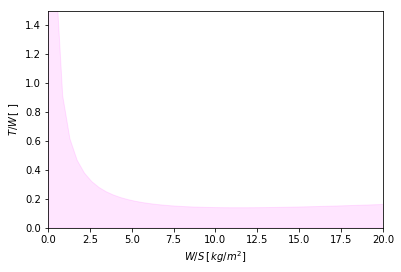

In [635]:
ConstVeloTurnPoly = ConstraintPoly(WSlistCVT_kgm2,TWlistCVT,'magenta',0.1)

figCVT = plt.figure()
PlotSetUp(0, WSmax_kgm2, 0, TWmax, '$W/S\,[\,kg/m^2]$', '$T/W\,[\,\,]$')
axCVT = figCVT.add_subplot(111)
axCVT.add_patch(ConstVeloTurnPoly)

### Constraint 2: Rate of Climb

Another constraint that can lead to interesting engine power versus wing area trade-offs is the rate of climb requirement. If $q$ denotes the dynamic pressure in the environmental conditions specified earlier, $V$ is the calibrated airspeed in the climb, and $V_V$ is the rate of ascent, the required thrust to weight ratio $T/W$ as a function of the wing loading $W/S$ can be calculated as:

$$\frac{T}{W} = \frac{V_V}{V}+\frac{q}{W/S}C_{Dmin}+k\frac{1}{q}\frac{W}{S}.$$

The Python implementation once again sweeps a sensible range of wing loading values to build the appropriate constraint diagram:

In [636]:
WSlistROC_Pa = np.linspace(Start_Pa,8500,Resolution)
TWlistROC = []
i = 0
for WS in WSlistROC_Pa:
    TW = RateOfClimb_mps/ClimbSpeed_mpsCAS + CDmin*q_climb_Pa/WSlistROC_Pa[i] \
    + k*WSlistROC_Pa[i]/q_climb_Pa
    TWlistROC.append(TW)
    i = i + 1
WSlistROC_kgm2 = [x*0.101971621 for x in WSlistROC_Pa]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


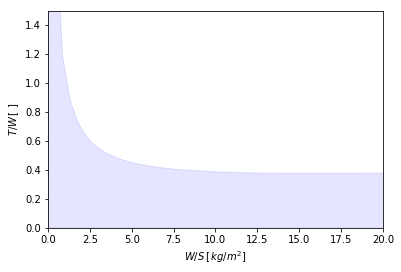

In [637]:
RateOfClimbPoly = ConstraintPoly(WSlistROC_kgm2,TWlistROC,'blue',0.1)

figROC = plt.figure()
PlotSetUp(0, WSmax_kgm2, 0, TWmax, '$W/S\,[\,kg/m^2]$', '$T/W\,[\,\,]$')

axROC = figROC.add_subplot(111)
axROC.add_patch(RateOfClimbPoly)

### Constraint 3: Take-off Ground Run Constraint

We next compute the thrust to weight ratio required for a target ground run distance on take-off. If $C_L^{\mathrm{TO}}$ and $C_D^{\mathrm{TO}}$ denote the take-off run lift and drag coefficients respectively, $d_\mathrm{GR}$ is the required ground run distance, $V_L$ is the lift-off speed, $\mu_\mathrm{TO}$ is the ground friction constant, the required thrust to weight ratio $T/W$ as a function of the wing loading $W/S$ can be calculated as:

$$\frac{T}{W} = \frac{V_L^2}{2g\,d_\mathrm{GR}} + \frac{q\,C_D^{\mathrm{TO}}}{W/S} + \mu_\mathrm{TO}\left(1-\frac{q\,C_L^{\mathrm{TO}}}{W/S}\right)$$

Sweeping the range of wing loading values as before, in order to build the appropriate constraint diagram:

In [638]:
WSlistGR_Pa = np.linspace(Start_Pa,8500,Resolution)
TWlistGR = []
i = 0
for WS in WSlistGR_Pa:
    TW =(TakeOffSpeed_mpsCAS**2)/(2*9.81*GroundRun_m) + \
    q_TO_Pa*CDTO/WSlistGR_Pa[i] + muTO*(1-q_TO_Pa*CLTO/WSlistGR_Pa[i])
    TWlistGR.append(TW) 
    i = i + 1
WSlistGR_kgm2 = [x*0.101971621 for x in WSlistGR_Pa]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


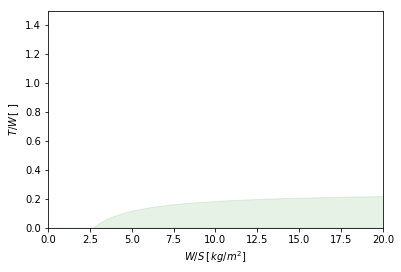

In [639]:
TORunPoly = ConstraintPoly(WSlistGR_kgm2,TWlistGR,'green',0.1)

figTOR = plt.figure()
PlotSetUp(0, WSmax_kgm2, 0, TWmax, '$W/S\,[\,kg/m^2]$', '$T/W\,[\,\,]$')

axTOR = figTOR.add_subplot(111)
axTOR.add_patch(TORunPoly)

### Constraint 4: Desired Cruise Airspeed

We next look at the cruise speed requirement. If $q$ denotes the dynamic pressure at cruise conditions, the required thrust to weight ratio $T/W$ as a function of the wing loading $W/S$ can be calculated as:

$$\frac{T}{W} = qC_\mathrm{Dmin}\frac{1}{W/S}+k\frac{1}{q}\frac{W}{S}.$$

The Python implementation once again sweeps a sensible range of wing loading values to build the appropriate constraint diagram:

In [640]:
WSlistCR_Pa = np.linspace(Start_Pa,8500,Resolution)
TWlistCR = []
i = 0
for WS in WSlistCR_Pa:
    TW = q_cruise_Pa*CDmin*(1.0/WSlistCR_Pa[i]) + k*(1/q_cruise_Pa)*WSlistCR_Pa[i]
    TWlistCR.append(TW)
    i = i + 1
WSlistCR_kgm2 = [x*0.101971621 for x in WSlistCR_Pa]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


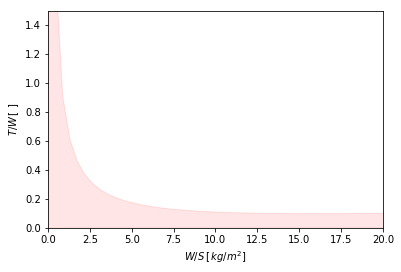

In [641]:
CruisePoly = ConstraintPoly(WSlistCR_kgm2,TWlistCR,'red',0.1)

figCruise = plt.figure()
PlotSetUp(0, WSmax_kgm2, 0, TWmax, '$W/S\,[\,kg/m^2]$', '$T/W\,[\,\,]$')

axCruise = figCruise.add_subplot(111)
axCruise.add_patch(CruisePoly)

### Constraint 5: Approach Speed

Assuming a given target approach speed (which, at the start of the typical final approach translates into a dynamic pressure $q^\mathrm{APP}$) and a maximum lift coefficient $C_L^\mathrm{APP}$ achievable in the approach configuration (with the high lift system, if present, fully deployed), the wing loading constraint can be formulated as:

$$\frac{W}{S} \leq q^\mathrm{APP} \,C_L^\mathrm{APP}$$

The approach speed constraint will thus impose a right hand boundary in the thrust to weight versus wing loading space at:

In [642]:
WS_APP_Pa = q_APP_Pa*CLmax_approach
WS_APP_kgm2 = WS_APP_Pa*0.101971621
print('{:03.2f} kg/m^2'.format(WS_APP_kgm2))

14.76 kg/m^2


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


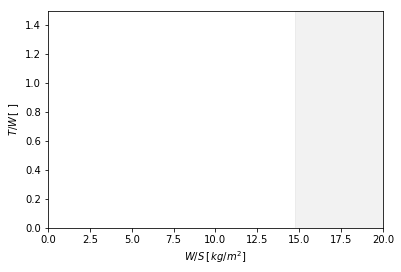

In [643]:
WSlistAPP_kgm2 = [WS_APP_kgm2, WSmax_kgm2, WSmax_kgm2, WS_APP_kgm2, WS_APP_kgm2 ]
TWlistAPP = [0, 0, TWmax, TWmax, 0 ]
AppStallPoly = ConstraintPoly(WSlistAPP_kgm2,TWlistAPP,'grey',0.1)

figAPP = plt.figure()
PlotSetUp(0, WSmax_kgm2, 0, TWmax, '$W/S\,[\,kg/m^2]$', '$T/W\,[\,\,]$')

axAPP = figAPP.add_subplot(111)
axAPP.add_patch(AppStallPoly)

### Combined Constraint Diagram

With all of the key constraints computed, we can now superimpose them to reveal what remains of the design space. 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0.98,'Combined constraint diagram')

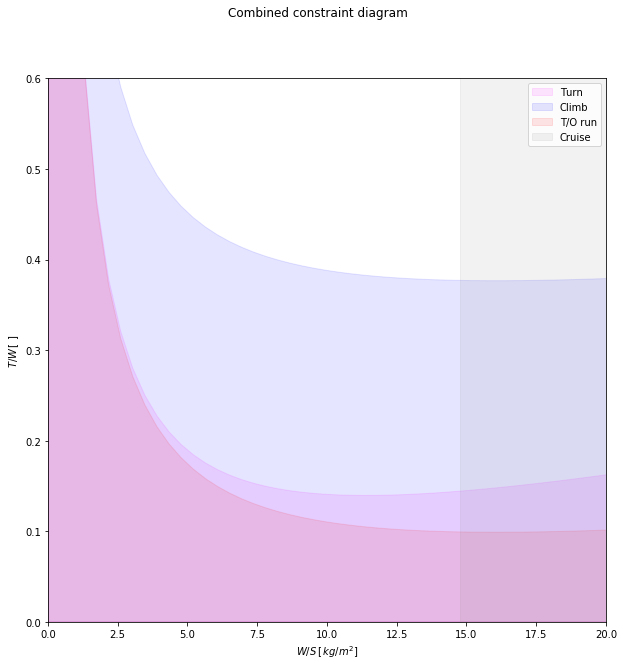

In [644]:
figCOMP = plt.figure(figsize = (10,10))
PlotSetUp(0, WSmax_kgm2, 0, 0.6, '$W/S\,[\,kg/m^2]$', '$T/W\,[\,\,]$')
axCOMP = figCOMP.add_subplot(111)

ConstVeloTurnPoly = ConstraintPoly(WSlistCVT_kgm2,TWlistCVT,'magenta',0.1)
axCOMP.add_patch(ConstVeloTurnPoly)

RateOfClimbPoly = ConstraintPoly(WSlistROC_kgm2,TWlistROC,'blue',0.1)
axCOMP.add_patch(RateOfClimbPoly)

#TORunPoly = ConstraintPoly(WSlistGR_kgm2,TWlistGR,'green',0.1)
#axCOMP.add_patch(TORunPoly)

CruisePoly = ConstraintPoly(WSlistCR_kgm2,TWlistCR,'red',0.1)
axCOMP.add_patch(CruisePoly)

AppStallPoly = ConstraintPoly(WSlistAPP_kgm2,TWlistAPP,'grey',0.1)
axCOMP.add_patch(AppStallPoly)

axCOMP.legend(['Turn','Climb','T/O run','Cruise', 'APP Stall'])
figCOMP.suptitle('Combined constraint diagram')





In [645]:
 PropEff = 0.6

In [646]:
 WSlistCVT_Pa = np.linspace(Start_Pa,8500,Resolution)
PlistCVT_kW = []
i = 0
for WS in WSlistCVT_Pa:
    TW = q_cruise_Pa*(CDmin/WSlistCVT_Pa[i]+ WSlistCVT_Pa[i]*k*(n_cvt_/q_cruise_Pa)**2)
    P_kW =  9.81 * TW * DesignGrossWeight_kg* CruisingSpeed_mpsTAS / PropEff/ (1.132*CruisingAltDens_kgm3/SeaLevelDens_kgm3-0.132)/1000
    PlistCVT_kW.append(P_kW)
    i = i + 1
WSlistCVT_kgm2 = [x*0.101971621 for x in WSlistCVT_Pa]

In [647]:
 WSlistROC_Pa = np.linspace(Start_Pa,8500,Resolution)
PlistROC_kW = []
i = 0
for WS in WSlistROC_Pa:
    TW = RateOfClimb_mps/ClimbSpeed_mpsCAS+ CDmin*q_climb_Pa/WSlistROC_Pa[i] + k*WSlistROC_Pa[i]/q_climb_Pa
    P_kW = 9.81 * TW * DesignGrossWeight_kg* ClimbSpeed_mpsCAS / PropEff/ (1.132*ClimbAltDens_kgm3/SeaLevelDens_kgm3-0.132)/1000
    PlistROC_kW.append(P_kW)
    i = i + 1
WSlistROC_kgm2 = [x*0.101971621 for x in WSlistROC_Pa]

In [648]:
WSlistGR_Pa = np.linspace(Start_Pa,8500,Resolution)
PlistGR_kW = []
i = 0
for WS in WSlistGR_Pa:
    TW =(TakeOffSpeed_mpsCAS**2)/(2*9.81*GroundRun_m) + q_TO_Pa*CDTO/WSlistGR_Pa[i]+ muTO*(1-q_TO_Pa*CLTO/WSlistGR_Pa[i])
    P_kW = 9.81 * TW * DesignGrossWeight_kg* TakeOffSpeed_mpsCAS / PropEff / (1.132*TakeOffDens_kgm3/SeaLevelDens_kgm3-0.132)/1000
    PlistGR_kW.append(P_kW)
    i = i + 1
WSlistGR_kgm2 = [x*0.101971621 for x in WSlistGR_Pa]

In [649]:
 WSlistCR_Pa = np.linspace(Start_Pa,8500,Resolution)
PlistCR_kW = []
i = 0
for WS in WSlistCR_Pa:
    TW = q_cruise_Pa*CDmin*(1.0/WSlistCR_Pa[i])+ k*(1/q_cruise_Pa)*WSlistCR_Pa[i]
    P_kW = 9.81 * TW * DesignGrossWeight_kg* CruisingSpeed_mpsTAS / PropEff / (1.132*CruisingAltDens_kgm3/SeaLevelDens_kgm3-0.132)/1000
    PlistCR_kW.append(P_kW)
    i = i + 1
WSlistCR_kgm2 = [x*0.101971621 for x in WSlistCR_Pa]

In [650]:
 WSlistAPP_kgm2 = [WS_APP_kgm2, WSmax_kgm2, WSmax_kgm2, WS_APP_kgm2, WS_APP_kgm2 ]
PlistAPP_kW = [0, 0, Pmax_kW, Pmax_kW, 0 ]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.05,0.95,'\n The feasible aeroplanelives\n in this white space')

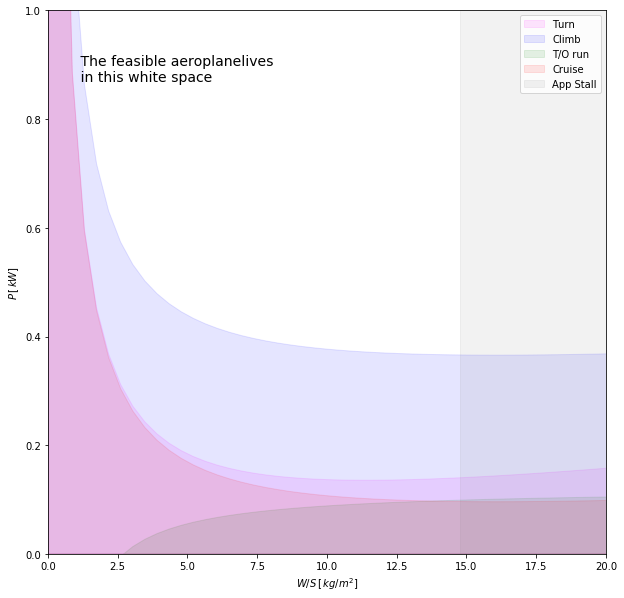

In [651]:
 figCOMP = plt.figure(figsize = (10,10))
PlotSetUp(0, WSmax_kgm2, 0, Pmax_kW, '$W/S\,[\,kg/m^2]$', '$P\,[\,kW]$')
axCOMP = figCOMP.add_subplot(111)
ConstVeloTurnPoly = ConstraintPoly(WSlistCVT_kgm2,PlistCVT_kW,'magenta',0.1)
axCOMP.add_patch(ConstVeloTurnPoly)
RateOfClimbPoly = ConstraintPoly(WSlistROC_kgm2,PlistROC_kW,'blue',0.1)
axCOMP.add_patch(RateOfClimbPoly)
TORunPoly = ConstraintPoly(WSlistGR_kgm2,PlistGR_kW,'green',0.1)
axCOMP.add_patch(TORunPoly)
CruisePoly = ConstraintPoly(WSlistCR_kgm2,PlistCR_kW,'red',0.1)
axCOMP.add_patch(CruisePoly)
AppStallPoly = ConstraintPoly(WSlistAPP_kgm2,PlistAPP_kW,'grey',0.1)
axCOMP.add_patch(AppStallPoly)
axCOMP.legend(['Turn','Climb','T/O run','Cruise', 'App Stall'])
textstr = '\n The feasible aeroplanelives\n in this white space'
axCOMP.text(0.05, 0.95, textstr, transform=axCOMP.transAxes, fontsize=14, verticalalignment='top')